## Lorentz Transform of a waterfall

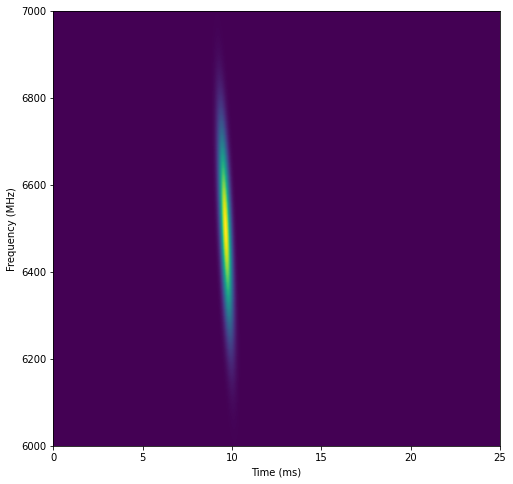

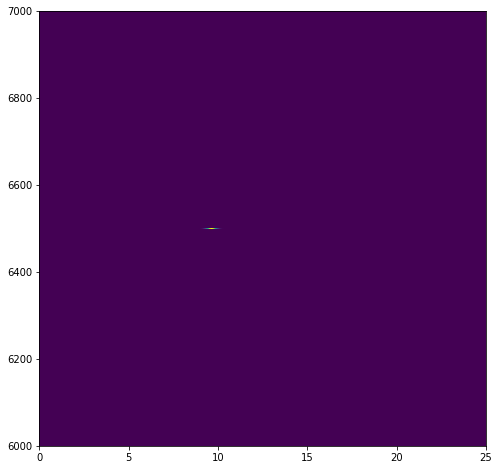

In [1]:
import os, glob, itertools
import numpy as np
import matplotlib.pyplot as plt
import pypulse, your
import driftrate, driftlaw
import frbrepeaters
import pandas as pd

%matplotlib inline
w, h = 10000, 500
x, y = np.meshgrid(range(0, w), range(0, h))
popt = [1, w/2, h/2, 60, 100, 1]
burst = driftrate.twoD_Gaussian((y, x), *popt).reshape(h, w)

tau_D = 10 /1000 # ms
tau_D = 35*7*24*60*60/1000 # ms
tau_D = 10
nu_0 = 1400 # MHz
low_f, high_f = 6000, 7000
tstart, tend = 0, 25
nu_obs = np.linspace(low_f, high_f, num=h)
delaytime = tau_D * nu_0 / nu_obs
tres = (tend - tstart)/w
beta = 0.8
gamma = 1/np.sqrt(1-beta**2)
# print(f'{tres=}')
# print(burst.shape)
# print(delaytime)
for i, row in enumerate(burst): 
    channelshift = int(delaytime[i]/tres)
    cshift = 2000
    burst[i] = np.roll(burst[i], channelshift-cshift) 

extent = [0, 25, low_f, high_f] # MHz

plt.figure(figsize=(8,8))
plt.imshow(burst, origin='lower', aspect='auto', interpolation='none', extent=extent)
plt.ylabel("Frequency (MHz)")
plt.xlabel("Time (ms)")
plt.figure(figsize=(8,8))
burst[0:249] = 0
burst[251:] = 0
plt.plot(burst[251])
plt.imshow(burst, origin='lower', aspect='auto', interpolation='none', extent=extent)

Text(0, 0.5, 'Frequency (MHz)')

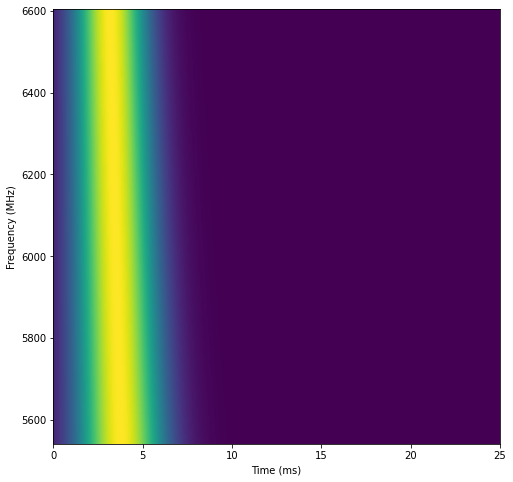

In [240]:
%matplotlib inline
nu_0 = 1400 # MHz
tau_D = 15  # ms
tau_W = 10  # ms

beta_source, delta_beta = 0.9, 0.08 # 
# beta_dist = np.random.normal(beta_source, delta_beta, 1000) # maybe use maxwell-juttner instead?
beta_dist = np.linspace(0.88, 0.914, num=1000)
nuobss = nu_0 * np.sqrt((1+beta_dist)/(1-beta_dist))
tds = tau_D * np.sqrt((1+beta_dist)/(1-beta_dist))
tws = tau_W * np.sqrt((1+beta_dist)/(1-beta_dist))

# plt.hist(beta, bins=100); plt.title('beta')
# plt.figure()
# plt.hist(nuobss, bins=100); plt.title('nu obs')
# plt.figure()
# plt.hist(tds, bins=100); plt.title('delay times')
# plt.figure()
# plt.hist(tws, bins=100); plt.title('burst durations')

def burstgauss(t, amplitude, td, tw):
    return amplitude * np.exp(-((t-td)/tw)**2)

amp = 10
extent = [0, 25, min(nuobss), max(nuobss)]
t = np.linspace(extent[0], extent[1], num=500)
wfall = np.zeros((500, len(t)))

for beta in beta_dist:
    if beta >= 1:
        continue
    nuobs = nu_0 * np.sqrt((1+beta)/(1-beta))
    td = tau_D * np.sqrt((1-beta)/(1+beta))
    tw = tau_W * np.sqrt((1-beta)/(1+beta))
    # print(nuobs, td)
    burst = burstgauss(t, amp, td, tw)
    chani = round(np.interp(nuobs, [min(nuobss), max(nuobss)], [0, wfall.shape[0]])) - 1
    
    wfall[chani] = burst

plt.figure(figsize=(8,8))
plt.imshow(wfall, origin='lower', extent=extent, aspect='auto')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (MHz)')

# Measuring Simulated Bursts

In [9]:
wfall = np.load('data/simulated/wfall0-5c.npz')['wfall']
np.mean(wfall)

2.545317350585774e-05

  0%|                                                                                            | 0/11 [00:00<?, ?it/s]

data/simulated/wfall0-08.npz


  0%|                                                                                            | 0/11 [00:00<?, ?it/s]

data/simulated/wfall0-5c.npz


  0%|                                                                                            | 0/11 [00:00<?, ?it/s]

data/simulated/wfall0-9c.npz


100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [01:20<00:00,  7.32s/it]


,DM,center_f,slope (mhz/ms),slope error (mhz/ms),theta,red_chisq,amplitude,xo,yo,sigmax,...,min_sigma_error,max_sigma_error,sigma_t,tau_w_old,tau_w,t_from_sigma,tau_w_error,sigma_t_ms,tau_w_ms,tau_w_ms_old
name,,,,,,,,,,,,,,,,,,,,,
wfall0-08.npz,560,1612.606258,0.001030,1.196839e-05,-414.689201,1.654471e+15,0.020317,0.672228,0.481667,4.475955,...,9.989051e-06,9.989051e-06,0.000056,0.000895,4.475346,0.000287,3.462057e-06,0.055790,4.475346,0.895069
wfall0-08.npz,561,1612.606258,0.001589,8.167961e-07,-420.971827,4.243227e+15,0.119189,0.994616,0.452327,0.176965,...,3.206115e-05,7.690623e-04,0.000035,0.000898,4.490116,0.000281,1.534398e-04,0.035393,4.490116,0.898023
wfall0-08.npz,562,1612.606258,0.642093,-1.412283e+00,-2.570796,8.536628e+17,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000e+00,-1.000000e+00,0.000200,0.000200,1.000000,-0.540302,1.531782e-01,0.200000,1.000000,0.200000
wfall0-08.npz,563,1612.606258,0.001600,2.243153e-07,-420.971816,4.846428e+16,0.133582,0.988885,0.455021,0.175004,...,NaN,NaN,0.000035,0.000897,4.482727,0.000280,NaN,0.035001,4.482727,0.896545
wfall0-08.npz,564,1612.606258,-26.014593,1.513251e-10,-447.638532,2.453592e+16,0.004282,0.293807,3.993176,117.578474,...,1.836143e-11,5.115312e-10,0.000890,0.000891,4.455230,-4.448662,3.674994e-12,0.890389,4.455230,0.891046
wfall0-08.npz,565,1612.606258,0.001764,6.733330e-15,-424.113244,4.836631e+31,0.135122,1.014967,0.459204,0.176280,...,5.582008e-13,1.072386e-11,0.000035,0.000897,4.483953,-0.000311,2.138321e-12,0.035256,4.483953,0.896791
wfall0-08.npz,566,1612.606258,0.001228,1.591661e-14,-430.396966,4.091416e+31,0.112976,0.787950,0.513117,4.490760,...,1.114065e-13,6.179018e-12,0.000041,0.000898,4.489101,-0.000249,1.234462e-12,0.040501,4.489101,0.897820
wfall0-08.npz,567,1612.606258,0.002142,9.599935e-15,-427.254459,2.325407e+31,0.138236,1.068549,0.494497,0.189103,...,1.323503e-12,2.148082e-11,0.000038,0.000899,4.494232,0.000405,4.279527e-12,0.037821,4.494232,0.898846
wfall0-08.npz,568,1612.606258,0.642093,-1.412283e+00,-2.570796,2.716739e+33,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000e+00,-1.000000e+00,0.000200,0.000200,1.000000,-0.540302,1.531782e-01,0.200000,1.000000,0.200000


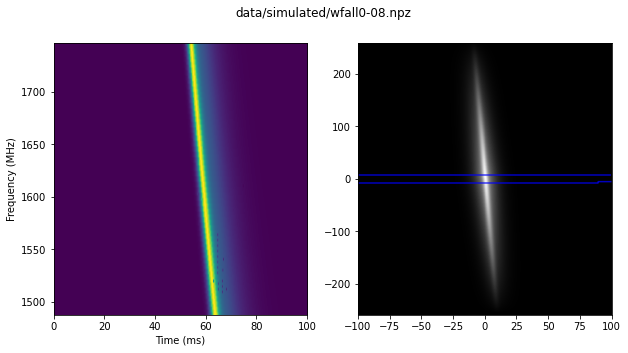

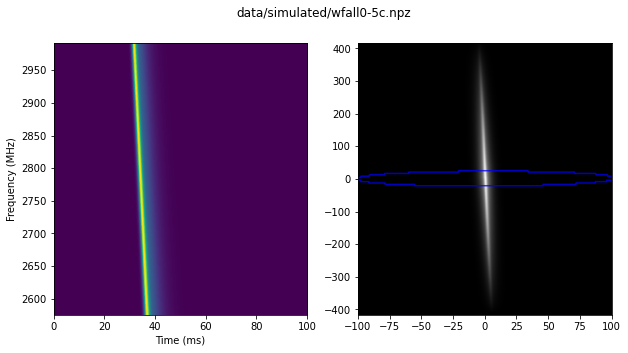

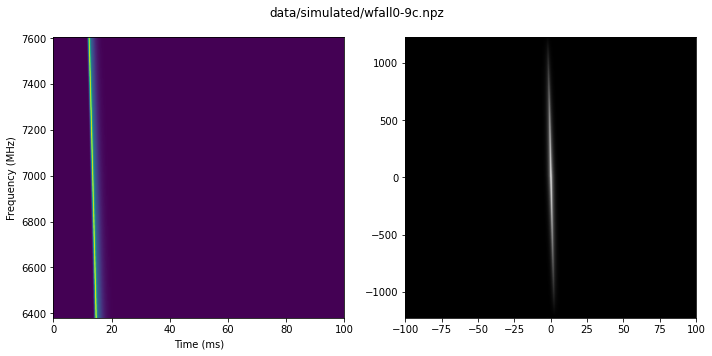

In [2]:
import importlib, warnings
importlib.reload(driftrate)
warnings.filterwarnings('ignore')

# files = glob.glob('data/simulated/*.pickle')
files = glob.glob('data/simulated/*.npz')

dfs = [
    2587493.268990133/1e6, # 0.08
    4163778.0529431296/1e6, # 0.5
    12243023.526545363/1e6 # 0.9
]

lowest_fs = [
    1487808629.6693263 /1e6, # Lowest Frequency: 0.08
    2575367578.9996853/1e6, # lowest freq for 0.5c is 
    6380479814.768375/1e6 # lowest freq for 0.9c is 
]

slopes = []
resultsdf = pd.DataFrame({})
for file, df, lowest_f in zip(files, dfs, lowest_fs):
    print(file)
    data = np.load(file, allow_pickle=True)
    wfall = data['wfall']
    
    wfallout = 'data/simulated/' + file.split('/')[-1].split('.')[0] + '.npz'
    dt = 0.1/wfall.shape[1] * 1000
    
    np.savez(wfallout, wfall=wfall, **{'DM': 565, 'dfs': [lowest_f]})
    
    extents, corrextents = driftrate.getExtents(wfall, df=df, dt=dt, lowest_freq=lowest_f)
    
    trialDMs = np.arange(560, 570+1, step=1)
    _, burstdf = driftrate.processDMRange(file.split('/')[-1], wfall, 565, trialDMs, df, dt, lowest_f, [])
    burstdf = driftlaw.computeModelDetails(burstdf)
    resultsdf = pd.concat([resultsdf, burstdf])
    measurement = driftrate.processBurst(wfall, df, dt, lowest_f, verbose=False, p0=[])
    slope, slope_err, popt, perr, theta, red_chisq, center_f, fitmap = measurement

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.suptitle(file)
    plt.imshow(wfall, origin='lower', aspect='auto', extent=extents)
    plt.xlabel('Time (ms)'); plt.ylabel("Frequency (MHz)")
    plt.subplot(1,2,2)
    plt.imshow(driftrate.autocorr2d(wfall), origin='lower', aspect='auto', cmap='gray', extent=corrextents)
    if popt[0] > 0:
        plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')
    
    slopes.append(slope)
    
plt.tight_layout()
display(resultsdf)
# resultsdf.to_csv('results/simulated_nov15.csv')
# driftrate.plotResults('results/simulated_nov15.csv', datafiles=files)